# Chapter 3 snippets

### snippet 3.0

Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
gr(size=(600,300))

Plots.GRBackend()

snippet 3.1

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV*PrV + PrPM*(1-PrV)
PrVP = PrPV*PrV / PrP

0.08683729433272395

snippet 3.2

Grid of 1001 steps

In [3]:
p_grid = range(0, step=0.001, stop=1)

0.0:0.001:1.0

all priors = 1.0

In [4]:
prior = ones(length(p_grid))

1001-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

Binomial pdf

In [5]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]

1001-element Array{Float64,1}:
 0.0                   
 8.374825191600018e-17 
 5.3438084689919926e-15
 6.068652771862778e-14 
 3.399517250519025e-13 
 1.2929107734374954e-12
 3.848982544705552e-12 
 9.676432504149003e-12 
 2.1495830280142858e-11
 4.344655104237097e-11 
 ⋮                     
 4.098446591204723e-5  
 2.7622876204442173e-5 
 1.7500535729793716e-5 
 1.0188911348240822e-5 
 5.248259379330843e-6  
 2.227480958032322e-6  
 6.639762126411521e-7  
 8.34972583212597e-8   
 0.0                   

As Uniform priar has been used, unstandardized posterior is equal to likelihood

In [6]:
posterior = likelihood .* prior

1001-element Array{Float64,1}:
 0.0                   
 8.374825191600018e-17 
 5.3438084689919926e-15
 6.068652771862778e-14 
 3.399517250519025e-13 
 1.2929107734374954e-12
 3.848982544705552e-12 
 9.676432504149003e-12 
 2.1495830280142858e-11
 4.344655104237097e-11 
 ⋮                     
 4.098446591204723e-5  
 2.7622876204442173e-5 
 1.7500535729793716e-5 
 1.0188911348240822e-5 
 5.248259379330843e-6  
 2.227480958032322e-6  
 6.639762126411521e-7  
 8.34972583212597e-8   
 0.0                   

Scale posterior such that they become probabilities

In [7]:
posterior = posterior / sum(posterior)

1001-element Array{Float64,1}:
 0.0                   
 8.3748251915414015e-19
 5.3438084689545903e-17
 6.068652771820303e-16 
 3.3995172504952317e-15
 1.2929107734284463e-14
 3.8489825446786124e-14
 9.676432504081277e-14 
 2.1495830279992406e-13
 4.3446551042066883e-13
 ⋮                     
 4.0984465911760373e-7 
 2.762287620424884e-7  
 1.7500535729671228e-7 
 1.0188911348169508e-7 
 5.24825937929411e-8   
 2.2274809580167314e-8 
 6.639762126365048e-9  
 8.349725832067529e-10 
 0.0                   

Sample using the computed posterior values as weights
In this example we keep the number of samples equal to the length of p_grid,
but that is not required.

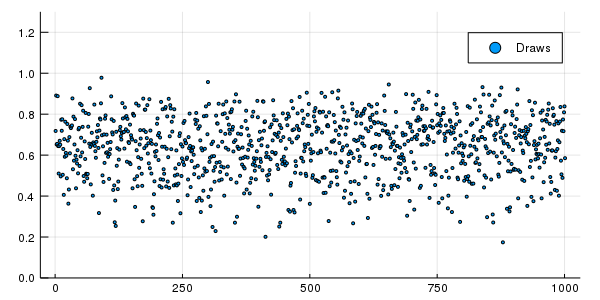

In [8]:
samples = sample(p_grid, Weights(posterior), length(p_grid))

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)

p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

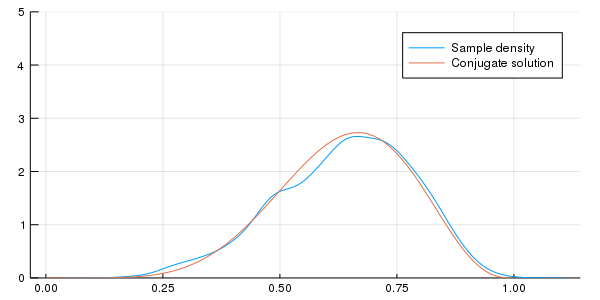

In [9]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [10]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(1, 2))
savefig("s3_2.pdf")

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*